In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(-0.5, 2047.5, 1364.5, -0.5)

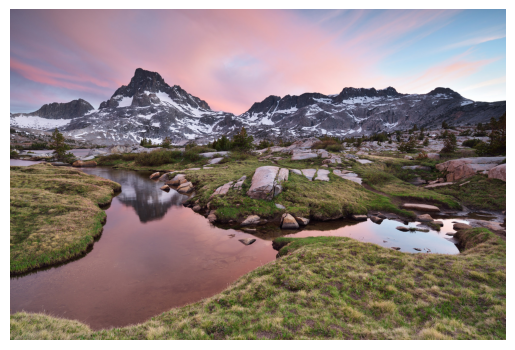

In [17]:
# img = cv2.imread("sample2.jpg", 1)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb);plt.axis("off")

(1365, 2048, 3)


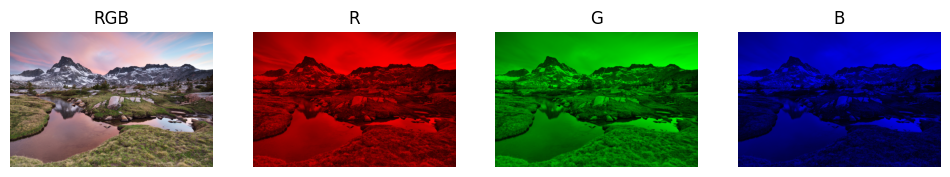

In [18]:
# r = np.ones_like(img)
# g = np.ones_like(img)
# b = np.ones_like(img)
# r[:, :, 0]= img_rgb[:, :, 0]
# g[:, :, 1]= img_rgb[:, :, 1]
# b[:, :, 2]= img_rgb[:, :, 2]
# fig = plt.figure(figsize=(12,10))
# plt.subplot(141);plt.imshow(img_rgb);plt.axis('off'); plt.title("RGB")
# plt.subplot(142);plt.imshow(r);plt.axis('off'); plt.title("R")
# plt.subplot(143);plt.imshow(g);plt.axis('off'); plt.title("G")
# plt.subplot(144);plt.imshow(b);plt.axis('off'); plt.title("B")
# print(img_rgb.shape)
# plt.show()

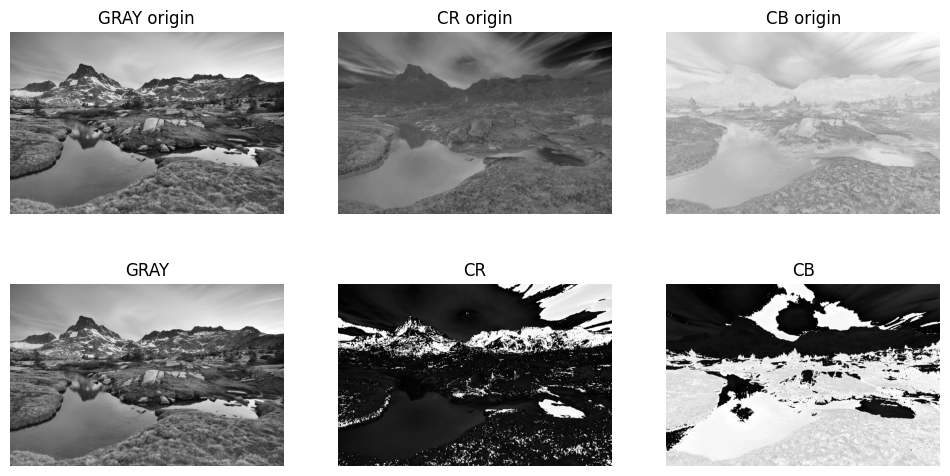

In [19]:
YCrCb = np.zeros_like(img_rgb, dtype=np.uint8)
YCrCb[..., 0] = (img_rgb[..., 0] * 0.299 + img_rgb[..., 1] * 0.587 + img_rgb[..., 2] * 0.114).astype(np.uint8)
YCrCb[..., 1] = (0.713 * (img_rgb[..., 0] - YCrCb[..., 0])).astype(np.uint8)
YCrCb[..., 2] = (0.564 * (img_rgb[..., 2] - YCrCb[..., 0])).astype(np.uint8)
Ycr_cb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCR_CB)
fig = plt.figure(figsize=(12,12))
plt.subplot(131);plt.imshow(YCrCb[..., 0], cmap='gray');plt.axis('off');plt.title("GRAY")
plt.subplot(132);plt.imshow(YCrCb[..., 1], cmap='gray');plt.axis('off');plt.title("CR")
plt.subplot(133);plt.imshow(YCrCb[..., 2], cmap='gray');plt.axis('off');plt.title("CB")
plt.subplot(231);plt.imshow(Ycr_cb[..., 0], cmap='gray');plt.axis('off');plt.title("GRAY origin")
plt.subplot(232);plt.imshow(Ycr_cb[..., 1], cmap='gray');plt.axis('off');plt.title("CR origin")
plt.subplot(233);plt.imshow(Ycr_cb[..., 2], cmap='gray');plt.axis('off');plt.title("CB origin")
plt.show()

In [20]:
# toRGB = np.zeros_like(YCrCb)
# toRGB[..., 0] = YCrCb[..., 0] + 1.403 * (YCrCb[..., 1] - 128)
# toRGB[..., 1] = YCrCb[..., 0] - 0.344 * (YCrCb[..., 2] - 128) - 0.714 * (YCrCb[..., 1] - 128)
# toRGB[..., 2] = YCrCb[..., 0] + 1.773 * (YCrCb[..., 2] - 128)
# plt.imshow(cv2.cvtColor(toRGB, cv2.COLOR_YCR_CB2RGB), cmap='gray');plt.axis('off');plt.title("function")
# plt.show()

(1365, 2048)
(1365, 512)


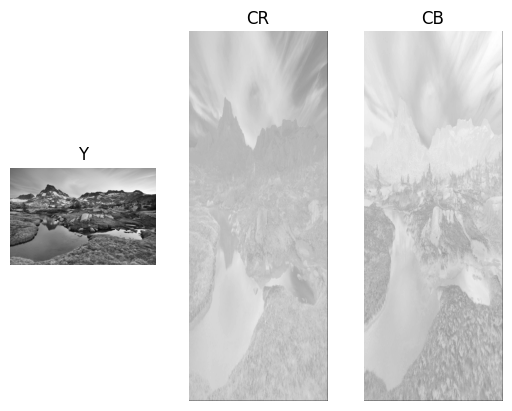

In [21]:
width, hieght, channels = img_rgb.shape
cb = np.zeros((width, hieght//4))
cr = np.zeros((width, hieght//4))
Y = Ycr_cb[..., 0]
# cb = np.ones_like((width/4, , channels))
for i in range(width-1):
    for j, t in zip(range(0,hieght-1, 4), range(hieght//4-1)):
        if i>= hieght-1:break
        cr[i, t] = Ycr_cb[i, j, 1]
        cb[i, t] = Ycr_cb[i, j, 2]
plt.subplot(131);plt.imshow(Y, cmap='gray');plt.axis('off');plt.title("Y")
plt.subplot(132);plt.imshow(cr, cmap='gray');plt.axis('off');plt.title("CR")
plt.subplot(133);plt.imshow(cb, cmap='gray');plt.axis('off');plt.title("CB")
print (Y.shape)
print (cr.shape)


In [36]:
# print(np.array(Y, dtype = int) - 128)
# print(Y)
# intYCrCb = np.array(Y, dtype = int), np.array(cr, dtype = int), np.array(cb, dtype = int)
# intYCrCb

(array([[ 99,  99,  99, ..., 141, 141, 141],
        [ 99,  99,  99, ..., 141, 141, 141],
        [ 99,  99, 100, ..., 142, 141, 141],
        ...,
        [ 67,  82,  75, ...,  57,  76, 103],
        [ 71,  80,  67, ...,  97,  93,  94],
        [ 78,  86,  71, ..., 106, 100,  98]]),
 array([[131, 131, 131, ..., 103, 106,   0],
        [131, 131, 131, ..., 104, 106,   0],
        [131, 131, 131, ..., 104, 106,   0],
        ...,
        [134, 132, 120, ..., 133, 134,   0],
        [134, 132, 118, ..., 133, 136,   0],
        [  0,   0,   0, ...,   0,   0,   0]]),
 array([[138, 138, 138, ..., 154, 153,   0],
        [138, 138, 138, ..., 154, 153,   0],
        [138, 138, 138, ..., 154, 153,   0],
        ...,
        [116, 121, 105, ..., 107, 112,   0],
        [116, 121, 102, ..., 102, 112,   0],
        [  0,   0,   0, ...,   0,   0,   0]]))

Text(0.5, 1.0, 'CR')

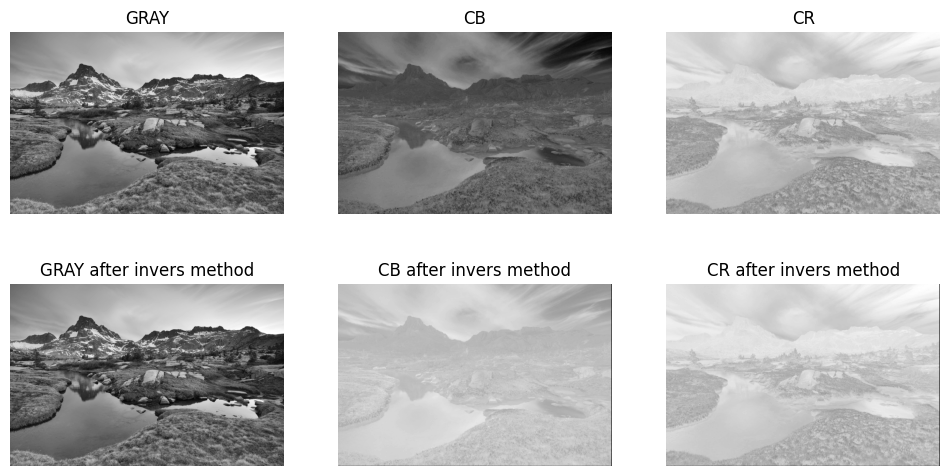

In [23]:
new_Img = np.zeros((width, hieght, channels))
for i in range(width-1):
    for j, t in zip(range(hieght-1), range(0,hieght-1,4)):
        if j >= hieght-1 or t+4 >= hieght:break
        new_Img[i, t:t+4, 1] = cr[i, j]
        new_Img[i, t:t+4, 2] = cb[i, j]
new_Img[:, :, 0] =  Ycr_cb[:, :, 0]
fig = plt.figure(figsize=(12,12))
plt.subplot(131);plt.imshow(new_Img[..., 0], cmap='gray');plt.axis('off');plt.title("GRAY after invers method")
plt.subplot(132);plt.imshow(new_Img[..., 1], cmap='gray');plt.axis('off');plt.title("CB after invers method")
plt.subplot(133);plt.imshow(new_Img[..., 2], cmap='gray');plt.axis('off');plt.title("CR after invers method")
plt.subplot(231);plt.imshow(Ycr_cb[..., 0], cmap='gray');plt.axis('off');plt.title("GRAY")
plt.subplot(232);plt.imshow(Ycr_cb[..., 1], cmap='gray');plt.axis('off');plt.title("CB")
plt.subplot(233);plt.imshow(Ycr_cb[..., 2], cmap='gray');plt.axis('off');plt.title("CR")


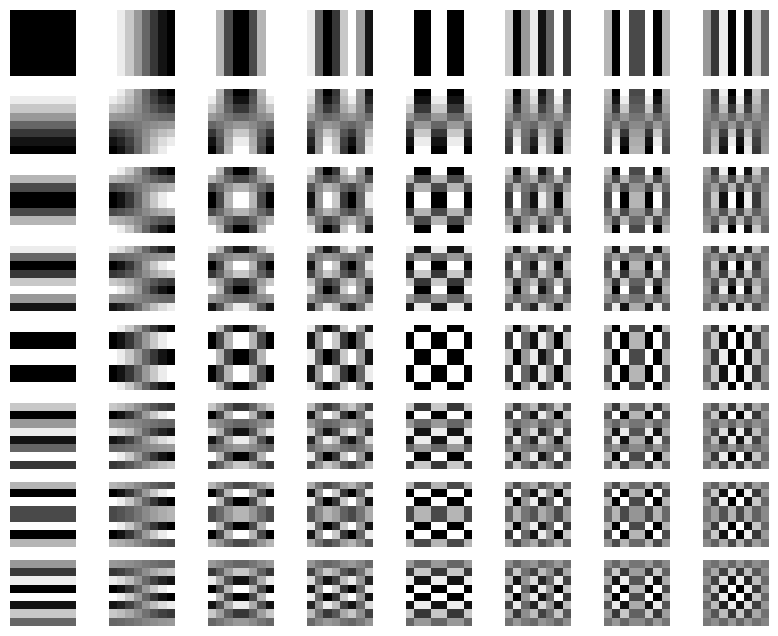

In [24]:
test = np.zeros((8, 8, 8, 8))
for u in range(8):
    for v in range(8):
        for x in range(8):
            for y in range(8):
                test[u, v, x, y] = np.cos(((2*x+1)*u*np.pi)/16) * np.cos(((2*y+1)*v*np.pi)/16)
fig, axes = plt.subplots(8, 8,figsize=(10, 8))
for u in range(8):
    for v in range(8):
        axes[u, v].imshow(test[u, v], cmap="gray")
        axes[u, v].axis("off")
plt.show()

In [25]:
def QQC(degree):
    newQ = np.zeros((8, 8), dtype=np.uint8)
    if 1 < degree < 50 : 
        for i in range(8):
            for j in range(8):
                newQ[i, j] = np.clip((50/degree) * Q[i, j], 0, 255)
        return newQ
    elif 50 < degree < 100:
        for i in range(8):
            for j in range(8):
                newQ[i, j] = np.clip(((100 - degree)/50)*Q[i, j], 0, 255)
        return newQ
    elif degree == 50:return Q
    else :return "sorry but not possible"
Q = np.array([  [16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]], dtype=np.uint8)
print(QQC(90))
print(QQC(50))
print(QQC(10))

[[ 3  2  2  3  4  8 10 12]
 [ 2  2  2  3  5 11 12 11]
 [ 2  2  3  4  8 11 13 11]
 [ 2  3  4  5 10 17 16 12]
 [ 3  4  7 11 13 21 20 15]
 [ 4  7 11 12 16 20 22 18]
 [ 9 12 15 17 20 24 24 20]
 [14 18 19 19 22 20 20 19]]
[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]
[[ 80  55  50  80 120 200 255 255]
 [ 60  60  70  95 130 255 255 255]
 [ 70  65  80 120 200 255 255 255]
 [ 70  85 110 145 255 255 255 255]
 [ 90 110 185 255 255 255 255 255]
 [120 175 255 255 255 255 255 255]
 [245 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]


In [26]:
# test2 = np.zeros((8, 8))
# g_x = 
# for u in range(8):
#   au = 1
#   if u == 0: au = 1/np.sqrt(2)
#   for v in range(8):
#     av = 1
#     if v == 0: av = 1/np.sqrt(2)
#     sumGx = 0
#     for x in range(8):
#         for y in range(8):
#             sumGx = sumGx + g_x[x, y] * np.cos(((2*x+1)*u*np.pi)/16) * np.cos(((2*y+1)*v*np.pi)/16)
#     G = (1/4)*au*av*sumGx
#     test2[u, v] = G

In [27]:
# hieght, width = test2.shape
# final = np.zeros_like(test2)
# for i in range(hieght):
#     for j in range(hieght):
#         final = round(test2[i, j]/Q[i, j])